# Illustration of sampling and truncation issues in periodograms

### Some imports etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in'

In [2]:
plt.rcParams['font.size'] = 18

### A function that takes samples from 

###  $c(t) = A  \sin(2\pi f t +0.5) + {\rm noise}$ 

### and (optionally) plots the power spectrum

In [3]:

def plot_data_fft(A=5,f=0.1,tmax=20,dt=1,noise=0, PlotPower=True, PlotLine=True) :
    '''Plot data and power spectrum from sinusoidal function (with optional noise), sampled at equally spaced times
    
    The data are sampled from the function c(t) = A * sin(2*pi*f*t +0.5) + noise. 
    The power spectrum is not oversampled.
    
    Output is two plots:
        c(t), with the full function as a line, and the datapoints shown
        power spectrum.
    
    Parameters
    -----------
    A:         amplitude
    f:         frequency
    tmax:      timespan
    dt:        spacing of datapoints
    noise:     amplitude of noise term (sampled from Gaussian)
    PlotPower: True/False - show P(f) or not
    
    '''
    
    # set up t, frequency arrays
    t = np.arange(0,tmax,dt)
    tfine=np.arange(0,tmax,0.05*dt)
    farr = np.arange(len(t))/(len(t)*dt)
    
    # find c (data points and for plotting)
    c = A*np.sin(2*np.pi*f*t+0.5) + noise*np.random.randn(len(t))
    cfine = A*np.sin(2*np.pi*f*tfine+0.5)
    
    # fast fourier transform. Keyword norm='ortho' gives normal (1/sqrt(n)) normalisation.
    # Otherwise this is absent
    X = np.fft.fft(c,len(t),norm='ortho')
    # Power spectrum
    P = 2*dt/len(t) *np.absolute(X)**2
    
    plt.gcf().set_size_inches((10,5))
    
    # plot c
    plt.axes([0.1,0.1,0.4,0.8])
    # function
    if PlotLine :
        plt.plot(tfine,cfine,'r-')
    # data points
    plt.plot(t,c,'bo')
    datalabel()
    
    plt.axes([0.6,0.1,0.4,0.8])
    # plot power spectrum
    if PlotPower :
        plt.plot(farr,P,'r-')
        # data points
        plt.plot(farr,P,'bo')
    plt.xlim(0,0.5/dt)
    freqlabel()
    plt.show()

    

def datalabel():
    '''Label data plot made by plot_data_fft'''
    plt.xlabel('time, t [unit]')
    plt.ylabel(r'c(t) (curve) and c$_j$ (points)')
    
def freqlabel():
    '''Label frequency-power plot made by plot_data_fft'''
    plt.xlabel(r'frequency, f [unit$^{-1}$]')
    plt.ylabel(r'Power per frequency point P(f)')


# We take samples at intervals $\Delta$t = 1 from various functions and compute the periodogram (using an FFT), to demonstrate some key principles

#### Note that this gives us $f_{Ny}=0.5$, and that all our periodograms will stop at that frequency (for now).


## $c(t) = A  \sin(2\pi f t +0.5)$


## f = 0.1, t_max = 20

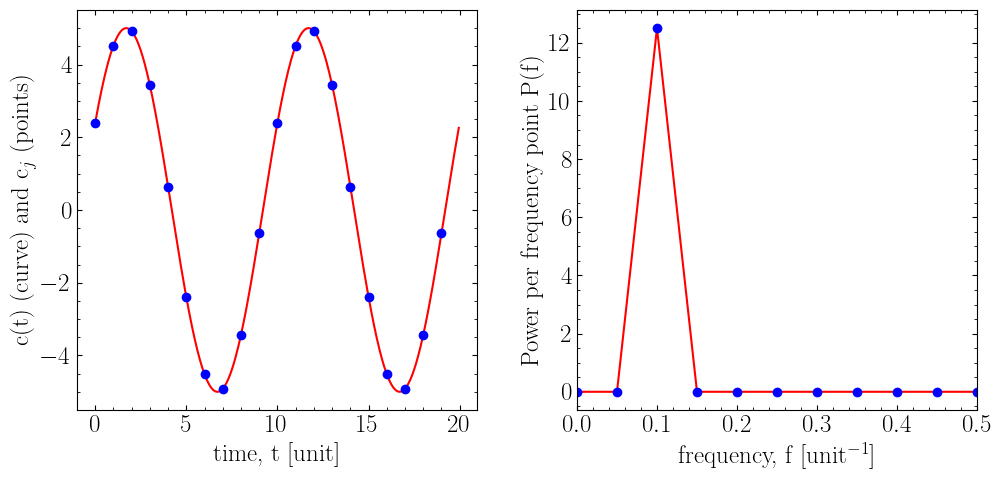

In [4]:
#plot_data_fft(A=5,f=0.1,tmax=20,PlotPower=False)
plot_data_fft(A=5,f=0.1,tmax=20)


Periodogram picks out the true frequency, no other peaks

## Higher frequency: f = 0.4, t_max = 20

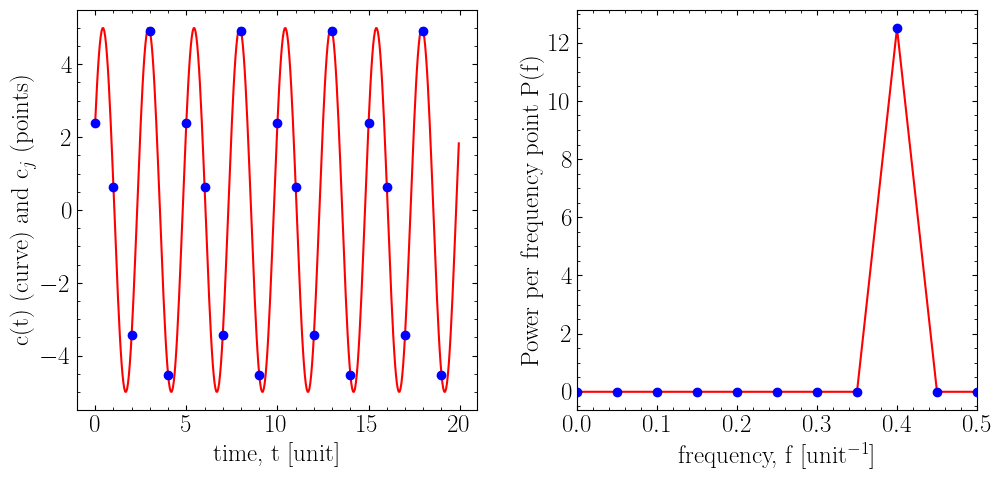

In [5]:
plot_data_fft(A=5,f=0.4,tmax=20)
#plot_data_fft(A=5,f=0.4,tmax=20)

Also fine

## Even higher frequency: f = 0.9, t_max = 20

#### Note: this frequency is above the Nyquist frequency $f_{\rm Ny} = 0.5$

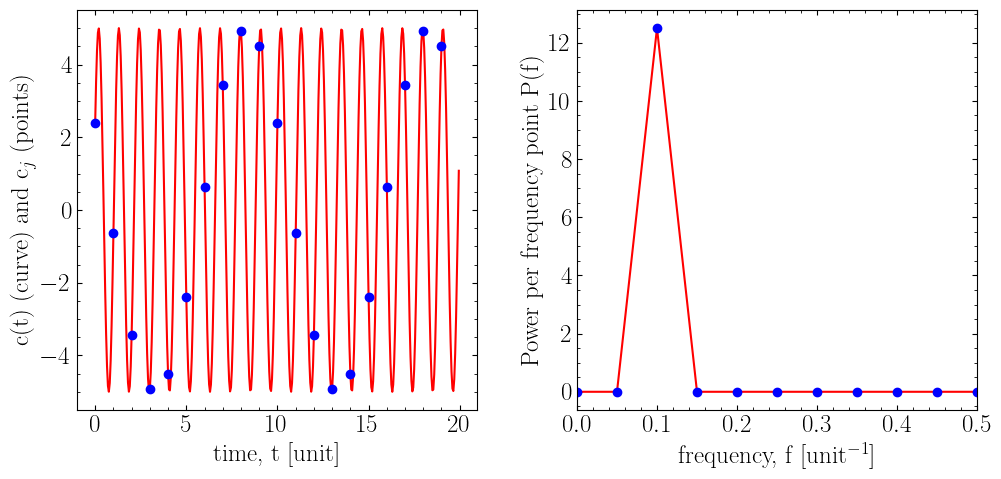

In [6]:
#plot_data_fft(A=5,f=1.9,tmax=20, PlotPower=False)
plot_data_fft(A=5,f=0.9,tmax=20)

Aliasing: $f > f_{\rm Ny} = 0.5$ is reflected in $f_{\rm Ny}$

## f = 0.13, t_max = 20

### Note: non-integer number of periods

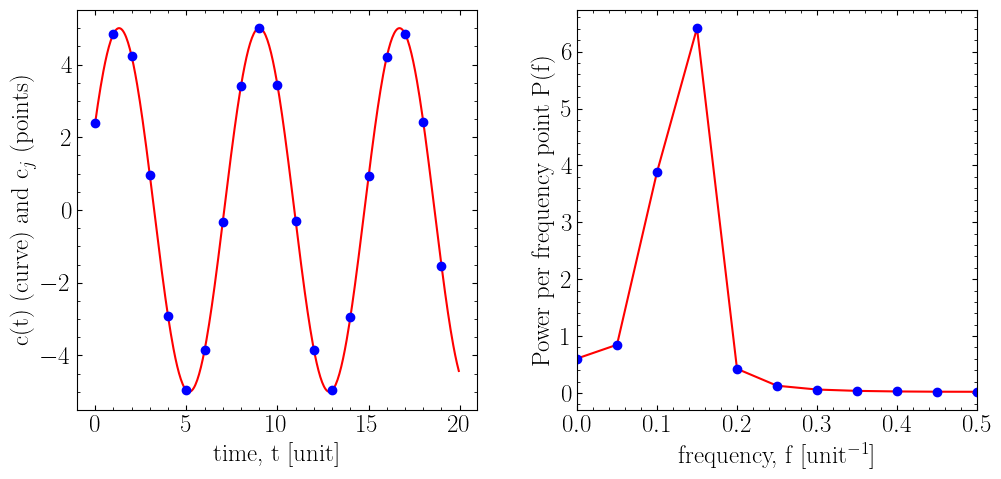

In [7]:
plot_data_fft(A=5,f=0.13,tmax=20)
#plot_data_fft(A=5,f=0.13,tmax=20)

##### This leads to 'frequency leakage', and the peak is not found as precisely

## But if we sample over a longer timespan, the frequency resolution is better.

(Recall our sinc function of width 1/T)

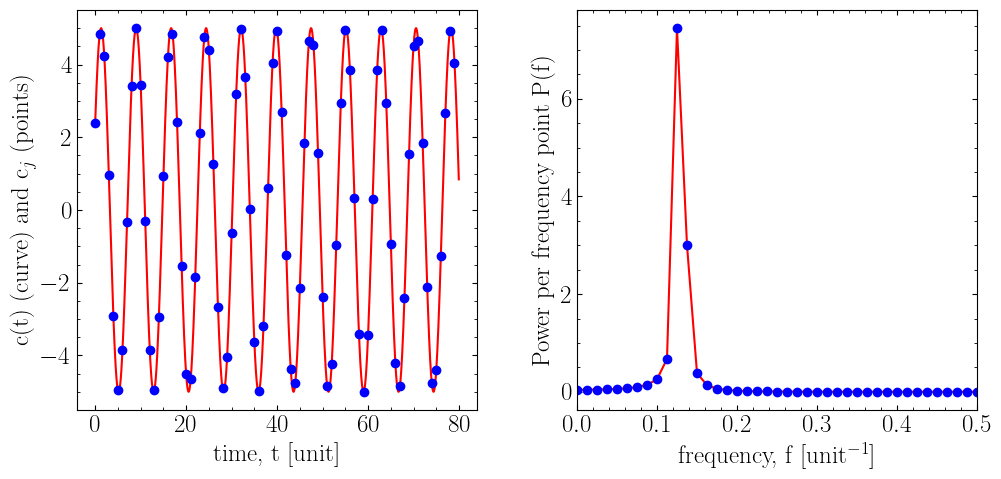

In [8]:
plot_data_fft(A=5,f=0.13,tmax=80)

#### Less frequency leakage

# 'White noise', i.e. noise with no associated period, gives ~constant power (random spikes with no trend in frequency)

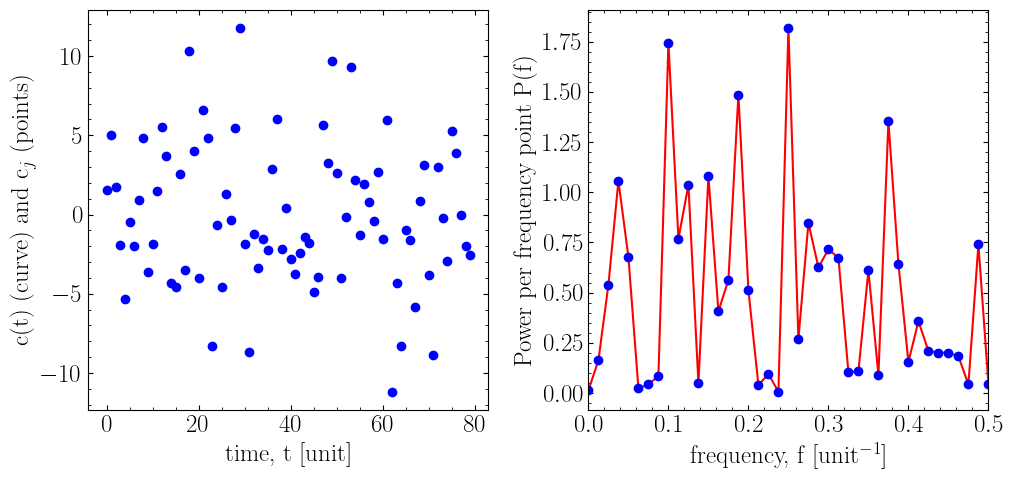

In [11]:
plot_data_fft(A=0,f=0.13,tmax=80, noise=5,PlotLine=False)

# Signal + white noise gives a peak + 'constant power'

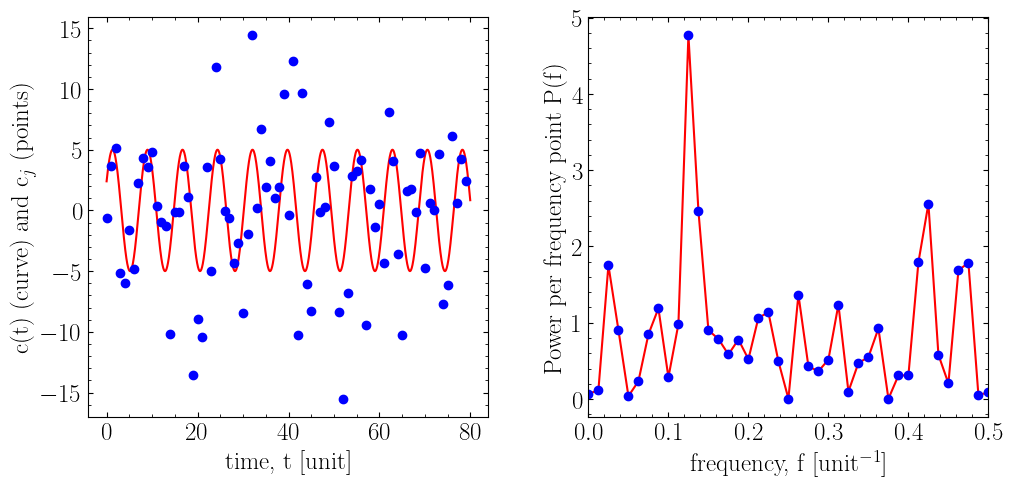

In [15]:
plot_data_fft(A=5,f=0.13,tmax=80, noise=5)

# More noise hides peak

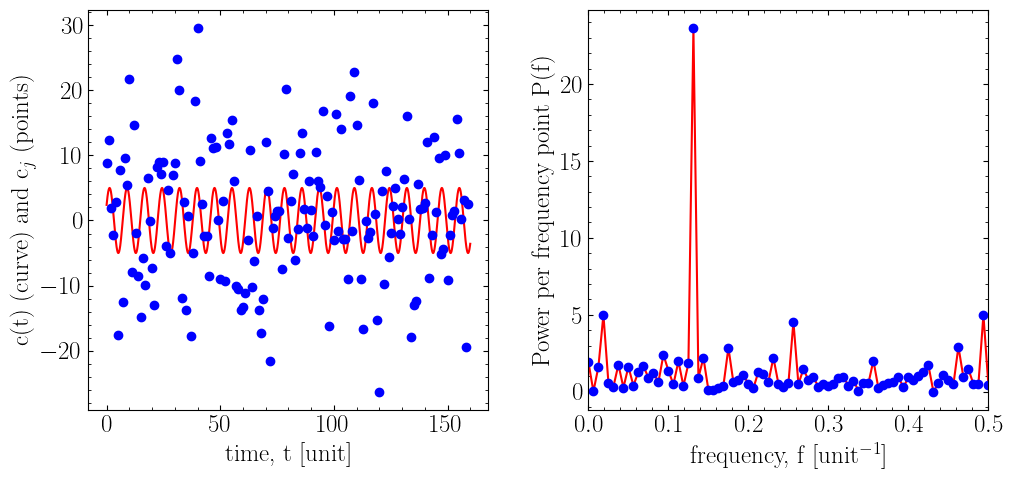

In [21]:
plot_data_fft(A=5,f=0.13,tmax=160, noise=10)

# More data -> clearer peak

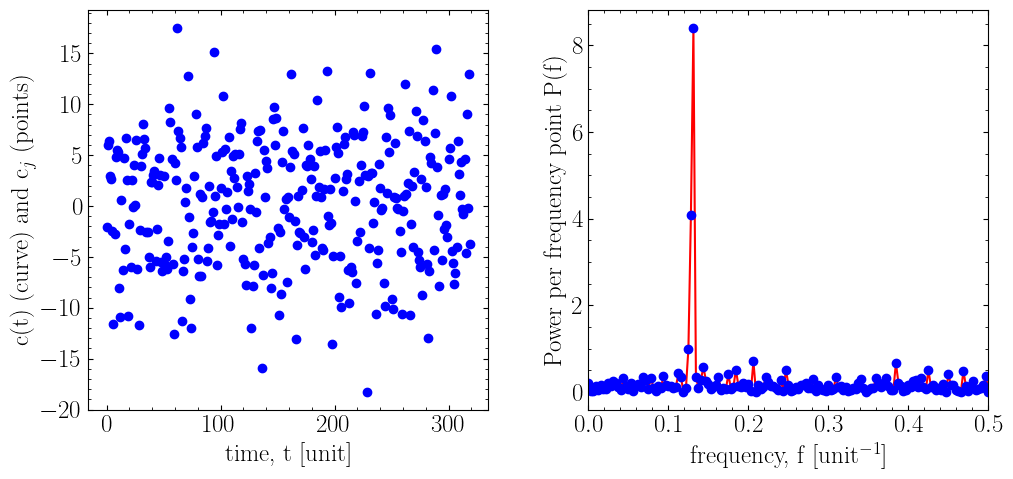

In [22]:

plot_data_fft(A=5,f=0.13,tmax=320, noise=5, PlotLine=False)
#plot_data_fft(A=5,f=0.13,tmax=320, noise=5)

This means that **if** you have white noise, you can beat down the noise by taking a longer and longer time series

# Oversampling 'smooths' the periodogram.

In [23]:

def plot_data_fft_oversample(A=5,f=0.1,tmax=20,dt=1,noise=0, PlotPower=True) :
    '''Plot data and power spectrum from sinusoidal function (with optional noise), sampled at equally spaced times
    
    The data are sampled from the function c(t) = A * sin(2*pi*f*t +0.5) + noise. 
    The power spectrum is oversampled.
    
    Output is two plots:
        c(t), with the full function as a line, and the datapoints shown
        power spectrum.
    
    Parameters
    -----------
    A:         amplitude
    f:         frequency
    tmax:      timespan
    dt:        spacing of datapoints
    noise:     amplitude of noise term (sampled from Gaussian)
    PlotPower: True/False - show P(f) or not
    
    '''
    
    # set up t, frequency arrays
    Oversampling = 5
    t = np.arange(0,tmax,dt)
    tfine=np.arange(0,tmax,0.05*dt)
    farr = np.arange(len(t)*Oversampling)/(len(t)*Oversampling*dt)
    
    # find c (data points and for plotting)
    c = A*np.sin(2*np.pi*f*t+0.5) + noise*np.random.randn(len(t))
    cfine = A*np.sin(2*np.pi*f*tfine+0.5)
    
    # fast fourier transform. Keyword norm='ortho' gives normal (1/sqrt(n)) normalisation.
    # Otherwise this is absent
    X = np.fft.fft(c,len(t)*Oversampling,norm='ortho')
    # Power spectrum
    P = 2*dt/len(t) *np.absolute(X)**2
    
    plt.gcf().set_size_inches((10,5))
    
    # plot c
    plt.axes([0.1,0.1,0.4,0.8])
    # function
    plt.plot(tfine,cfine,'r-')
    # data points
    plt.plot(t,c,'bo')
    datalabel()
    
    # plot power spectrum
    plt.axes([0.6,0.1,0.4,0.8])
    # interpolation 
    if PlotPower :
        plt.plot(farr,P,'r-')
        # data points
        #plt.plot(farr,P,'bo')
    plt.xlim(0,0.5/dt)
    freqlabel()
    plt.show()


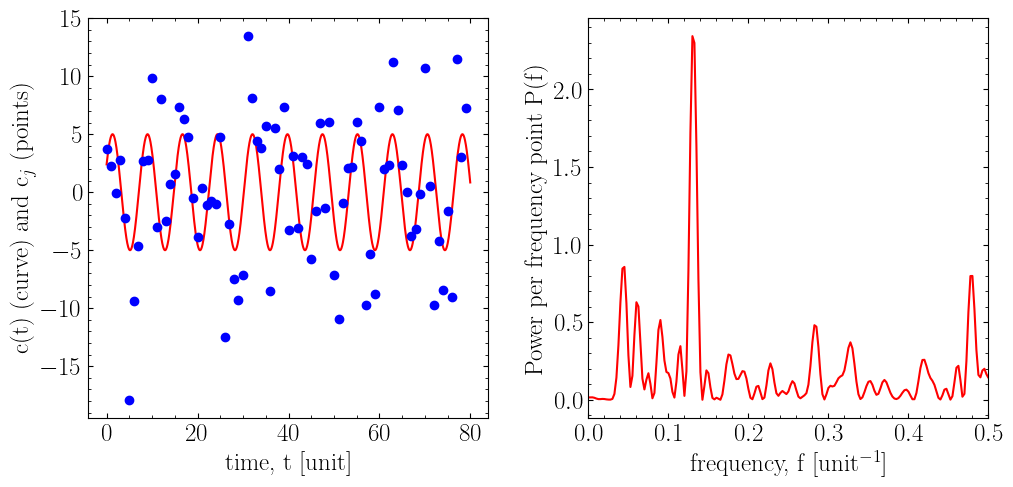

In [24]:
#plot_data_fft(A=5,f=0.1,tmax=20)
#plot_data_fft(A=5,f=0.13,tmax=80, noise=5,PlotPower=True)
plot_data_fft_oversample(A=5,f=0.13,tmax=80, noise=5,PlotPower=True)

Note that the maximum attainable resolution is 1/T

# What if I don't have data sampled neatly at regular intervals?

### What I need is a Lomb-Scargle periodogram

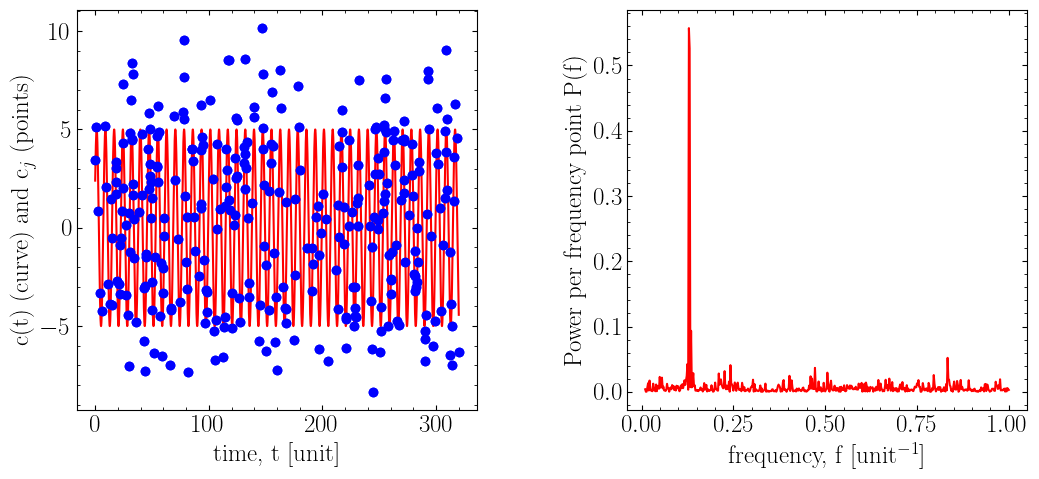

In [25]:
A=5
f=0.13
noise=2
farr = 2.*np.pi*np.linspace(0.01,1,500)

# Select times at random
t = (np.random.rand(320))*320.
tfine=np.arange(0,320,0.05)

# Determine data values
c = A*np.sin(2*np.pi*f*t+0.5) + noise*np.random.randn(len(t))
cfine =  A*np.sin(2*np.pi*f*tfine+0.5)


# Calculate lomb-scargle periodogram (using built in function)
# This needs to be told explicitly to normalise, and can't account for weighting w_j
pgram = scipy.signal.lombscargle(t,c, farr,normalize=True)

# plot it
plt.gcf().set_size_inches((10,5))
plt.axes([0.1,0.1,0.4,0.8])
plt.plot(t,c,'bo')
plt.plot(tfine,cfine,'r-')
plt.plot(t,c,'bo')
datalabel()
plt.axes([0.65,0.1,0.4,0.8])
plt.plot(farr/(2*np.pi),pgram,'r-')

freqlabel()


plt.show()

# Can also plot the 'folded' data.

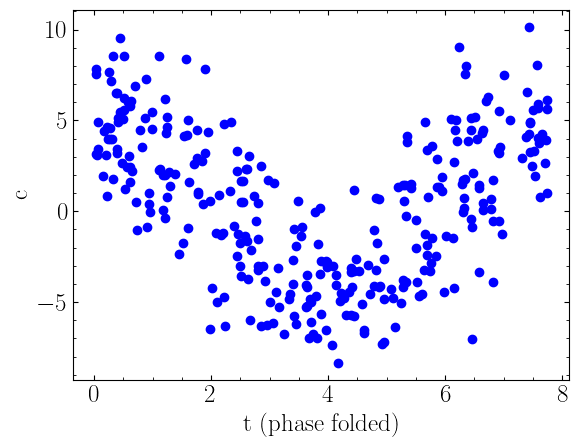

In [26]:
fmax = farr[np.argmax(pgram)]/(2*np.pi)
Period = 1./fmax
t_fold = t - np.floor(t /Period)*Period
plt.plot(t_fold,c,'bo')
plt.xlabel('t (phase folded)')
plt.ylabel('c')
plt.show()

# Well that worked rather nicely.

## But what if my data points aren't so randomly distributed? What if I can only collect data durring the first half of my time unit 

### e.g. only at night....

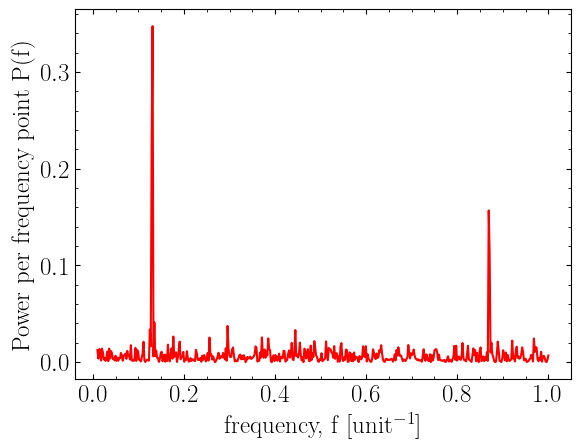

In [27]:
A=5
f=0.13
noise=5
farr = 2.*np.pi*np.linspace(0.01,1,500)
t = (np.random.rand(320))*320.

# Take data points from range i+0.5 to i+1. and put them in the range 0.-0.5
# This simulates only seeing the object at night
t[np.mod(t,1)>0.5] = t[np.mod(t,1)>0.5] - 0.5

c = A*np.sin(2*np.pi*f*t+0.5) + noise*np.random.randn(len(t))
cfine =  A*np.sin(2*np.pi*f*tfine+0.5)
pgram = scipy.signal.lombscargle(t,c, farr,normalize=True)

plt.plot(farr/(2*np.pi),pgram,'r-')
freqlabel()
plt.show()

# Window effect! There's no period of  0.87 unit$^{-1}$ in our data, but because our datapoints are only taken at certain times...

## We can show the periodogram of the window function

We find a peak at 1/unit, as expected if we have imposed a diurnal sampling rate 

The secondary peak in the Lomb-Scargle periodogram is the alias at 0.87 = 1.0 - 0.13

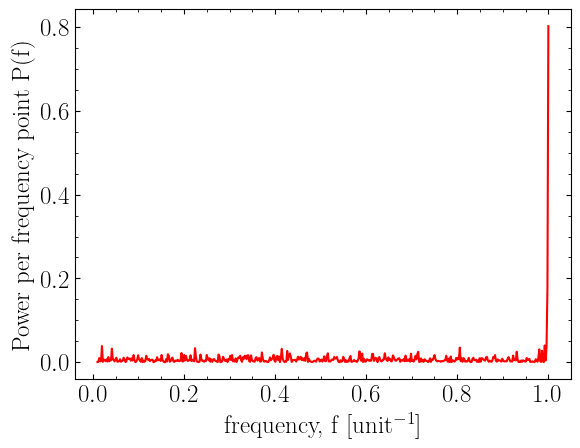

In [28]:
ones = np.ones(len(t))
window = scipy.signal.lombscargle(t,ones,farr,normalize=True)
plt.plot(farr/(2*np.pi),window,'r-')
freqlabel()
plt.show()

In [ ]:
nt = 100001
t = np.linspace(0,100,nt)
P = 10
Delta = 0.01
D = 0.1
start = 2
noise = 0.01

F = 1 - Delta * (np.abs((t+start) % P) <= D) + np.random.normal(size=nt)*noise

F = F - np.mean(F) # subtract mean to remove const fft term

In [ ]:
plt.plot(F)
plt.show()

In [ ]:
fft = np.fft.fft(F)
Powerspec = np.abs(fft)**2
plt.plot(Powerspec[0:100])
plt.show()